### Getting started

This notebook gives an introduction on how to install pyaerocom and run it on your local machine. 

#### Requirements

Before installation please make sure you have all required dependencies installed ([see here for a list of dependencies](http://aerocom.met.no/pyaerocom/readme.html#requirements)).

#### Installation

Please download and unzip the [pyaerocom GitHub repository](https://github.com/metno/pyaerocom) or clone it using 

``$ git clone https://github.com/metno/pyaerocom.git``

into a local directory of your choice. Then, navigate into the pyaerocom root directory where the setup.py file is located. Use

``$ python setup.py install``

to install the package normally or use 

``$ python setup.py develop``

to install the package in development mode. The latter leaves the code editable and while ``install`` installs and freezes the current version of the code in your Python environment ([see here](https://packaging.python.org/tutorials/distributing-packages/#working-in-development-mode) or [here](https://stackoverflow.com/questions/19048732/python-setup-py-develop-vs-install) for more info).

If everything worked out as expected, you should be able to import pyaerocom from within a Python3 console.

In [1]:
import pyaerocom as pya
print("Installation base directory: %s" %pya.__dir__)
print("Version: %s" %pya.__version__)

Installation base directory: /home/jonasg/github/pyaerocom/pyaerocom
Version: 0.0.1.dev1


#### Setting global environment variables

The import of data from the AEROCOM database in pyaerocom is controlled via an instance of the `Config` class.

In [2]:
print("Current config: %s" %pya.const.short_str())

Current config: 
Pyaerocom Config
----------------

VERBOSE: True
MIN_YEAR: 0
MAX_YEAR: 3000
GRID_IO: 
Pyaerocom GridIO
----------------

   FILE_TYPE: .nc
   TS_TYPES: ['hourly', '3hourly', 'daily', 'monthly']
   DEL_TIME_BOUNDS: True
   SHIFT_LONS: True
   CHECK_TIME_FILENAME: True
   EQUALISE_METADATA: True
   USE_RENAMED_DIR: True
   USE_FILECONVENTION: True
   INCLUDE_SUBDIRS: False
GCOSPERCENTCRIT: 0.1
GCOSABSCRIT: 0.04
OBSNET_NONE: NONE
NOMODELNAME: OBSERVATIONS-ONLY
REVISION_FILE: Revision.txt
AERONET_SUN_V2L15_AOD_DAILY_NAME: AeronetSunV2Lev1.5.daily
AERONET_SUN_V2L15_AOD_ALL_POINTS_NAME: AeronetSun_2.0_NRT
AERONET_SUN_V2L2_AOD_DAILY_NAME: AeronetSunV2Lev2.daily
AERONET_SUN_V2L2_AOD_ALL_POINTS_NAME: AeronetSunV2Lev2.AP
AERONET_SUN_V2L2_SDA_DAILY_NAME: AeronetSDAV2Lev2.daily
AERONET_SUN_V2L2_SDA_ALL_POINTS_NAME: AeronetSDAV2Lev2.AP
AERONET_SUN_V3L15_AOD_DAILY_NAME: AeronetSunV3Lev1.5.daily
AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME: AeronetSunV3Lev1.5.AP
AERONET_SUN_V3L2_AOD_DAILY_N

You can check if the relevant base directories `MODELBASEDIR` and `OBSBASEDIR` are valid.

In [3]:
print("All paths valid? %s" %pya.const.READY)

All paths valid? True


If you work on your local machine and use the external AEROCOM user server, you might need to change the path settings. Now you have several options to do this:

1. Change all relevant paths directly in the [paths.ini](https://github.com/metno/pyaerocom/blob/master/pyaeroco /data/paths.ini) file of your installation.
2. Create a new config file <myconfig.ini> and iniate your configuration in your Python console by calling ``pyaerocom.config = pyaerocom.Config(config_file=<myconfig.ini>)``
3. Change the settings directly within the instance of the ``Config`` class, as follows:

In [4]:
cfg = pya.const
cfg.MODELBASEDIR="path/that/does/not/exist"
cfg.OBSBASEDIR="path/that/does/not/exist"
print("All paths valid? %s" %cfg.READY)

All paths valid? False


See what's currently in there.

In [5]:
print("Current config: {}".format(pya.const.short_str()))

Current config: 
Pyaerocom Config
----------------

VERBOSE: True
MIN_YEAR: 0
MAX_YEAR: 3000
GRID_IO: 
Pyaerocom GridIO
----------------

   FILE_TYPE: .nc
   TS_TYPES: ['hourly', '3hourly', 'daily', 'monthly']
   DEL_TIME_BOUNDS: True
   SHIFT_LONS: True
   CHECK_TIME_FILENAME: True
   EQUALISE_METADATA: True
   USE_RENAMED_DIR: True
   USE_FILECONVENTION: True
   INCLUDE_SUBDIRS: False
GCOSPERCENTCRIT: 0.1
GCOSABSCRIT: 0.04
OBSNET_NONE: NONE
NOMODELNAME: OBSERVATIONS-ONLY
REVISION_FILE: Revision.txt
AERONET_SUN_V2L15_AOD_DAILY_NAME: AeronetSunV2Lev1.5.daily
AERONET_SUN_V2L15_AOD_ALL_POINTS_NAME: AeronetSun_2.0_NRT
AERONET_SUN_V2L2_AOD_DAILY_NAME: AeronetSunV2Lev2.daily
AERONET_SUN_V2L2_AOD_ALL_POINTS_NAME: AeronetSunV2Lev2.AP
AERONET_SUN_V2L2_SDA_DAILY_NAME: AeronetSDAV2Lev2.daily
AERONET_SUN_V2L2_SDA_ALL_POINTS_NAME: AeronetSDAV2Lev2.AP
AERONET_SUN_V3L15_AOD_DAILY_NAME: AeronetSunV3Lev1.5.daily
AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME: AeronetSunV3Lev1.5.AP
AERONET_SUN_V3L2_AOD_DAILY_N

As you can see, `MODELBASEDIR` and `OBSBASEDIR` contain the invalid paths, but e.g. the list containing model directories (`MODELDIRS`) still has the original settings. This is because, these are written in the method ``load_config(config_file)`` or the wrapper method ``reload()`` which does the same.  Now reload the config_file and print.

In [6]:
cfg.reload()
print("Current config: {}".format(pya.const.short_str()))

Current config: 
Pyaerocom Config
----------------

VERBOSE: True
MIN_YEAR: 0
MAX_YEAR: 3000
GRID_IO: 
Pyaerocom GridIO
----------------

   FILE_TYPE: .nc
   TS_TYPES: ['hourly', '3hourly', 'daily', 'monthly']
   DEL_TIME_BOUNDS: True
   SHIFT_LONS: True
   CHECK_TIME_FILENAME: True
   EQUALISE_METADATA: True
   USE_RENAMED_DIR: True
   USE_FILECONVENTION: True
   INCLUDE_SUBDIRS: False
GCOSPERCENTCRIT: 0.1
GCOSABSCRIT: 0.04
OBSNET_NONE: NONE
NOMODELNAME: OBSERVATIONS-ONLY
REVISION_FILE: Revision.txt
AERONET_SUN_V2L15_AOD_DAILY_NAME: AeronetSunV2Lev1.5.daily
AERONET_SUN_V2L15_AOD_ALL_POINTS_NAME: AeronetSun_2.0_NRT
AERONET_SUN_V2L2_AOD_DAILY_NAME: AeronetSunV2Lev2.daily
AERONET_SUN_V2L2_AOD_ALL_POINTS_NAME: AeronetSunV2Lev2.AP
AERONET_SUN_V2L2_SDA_DAILY_NAME: AeronetSDAV2Lev2.daily
AERONET_SUN_V2L2_SDA_ALL_POINTS_NAME: AeronetSDAV2Lev2.AP
AERONET_SUN_V3L15_AOD_DAILY_NAME: AeronetSunV3Lev1.5.daily
AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME: AeronetSunV3Lev1.5.AP
AERONET_SUN_V3L2_AOD_DAILY_N

The ``reload`` (and ``load_config``) method actually checks if the currently defined base directories exist, and if not, it uses the ones that are defined in the [paths.ini](http://aerocom.met.no/pyaerocom/config_files.html#paths-and-directories) file. This is the why the above configuration is the intial one. If you choose valid paths, this should work.

In [7]:
cfg = pya.const
cfg.MODELBASEDIR="."
cfg.OBSBASEDIR="."
print("All paths valid? %s" %cfg.READY)
cfg.reload()
print("Current config: %s" %cfg.short_str())

All paths valid? True
Current config: 
Pyaerocom Config
----------------

VERBOSE: True
MIN_YEAR: 0
MAX_YEAR: 3000
GRID_IO: 
Pyaerocom GridIO
----------------

   FILE_TYPE: .nc
   TS_TYPES: ['hourly', '3hourly', 'daily', 'monthly']
   DEL_TIME_BOUNDS: True
   SHIFT_LONS: True
   CHECK_TIME_FILENAME: True
   EQUALISE_METADATA: True
   USE_RENAMED_DIR: True
   USE_FILECONVENTION: True
   INCLUDE_SUBDIRS: False
GCOSPERCENTCRIT: 0.1
GCOSABSCRIT: 0.04
OBSNET_NONE: NONE
NOMODELNAME: OBSERVATIONS-ONLY
REVISION_FILE: Revision.txt
AERONET_SUN_V2L15_AOD_DAILY_NAME: AeronetSunV2Lev1.5.daily
AERONET_SUN_V2L15_AOD_ALL_POINTS_NAME: AeronetSun_2.0_NRT
AERONET_SUN_V2L2_AOD_DAILY_NAME: AeronetSunV2Lev2.daily
AERONET_SUN_V2L2_AOD_ALL_POINTS_NAME: AeronetSunV2Lev2.AP
AERONET_SUN_V2L2_SDA_DAILY_NAME: AeronetSDAV2Lev2.daily
AERONET_SUN_V2L2_SDA_ALL_POINTS_NAME: AeronetSDAV2Lev2.AP
AERONET_SUN_V3L15_AOD_DAILY_NAME: AeronetSunV3Lev1.5.daily
AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME: AeronetSunV3Lev1.5.AP
AERONE

This is it! Note, however, that we just inserted the current directory which is not where the data actually is. Thus, before continuing, we have to reload the config as it was at the beginning:

In [8]:
cfg.reload(keep_basedirs=False)
print(cfg.short_str())


Pyaerocom Config
----------------

VERBOSE: True
MIN_YEAR: 0
MAX_YEAR: 3000
GRID_IO: 
Pyaerocom GridIO
----------------

   FILE_TYPE: .nc
   TS_TYPES: ['hourly', '3hourly', 'daily', 'monthly']
   DEL_TIME_BOUNDS: True
   SHIFT_LONS: True
   CHECK_TIME_FILENAME: True
   EQUALISE_METADATA: True
   USE_RENAMED_DIR: True
   USE_FILECONVENTION: True
   INCLUDE_SUBDIRS: False
GCOSPERCENTCRIT: 0.1
GCOSABSCRIT: 0.04
OBSNET_NONE: NONE
NOMODELNAME: OBSERVATIONS-ONLY
REVISION_FILE: Revision.txt
AERONET_SUN_V2L15_AOD_DAILY_NAME: AeronetSunV2Lev1.5.daily
AERONET_SUN_V2L15_AOD_ALL_POINTS_NAME: AeronetSun_2.0_NRT
AERONET_SUN_V2L2_AOD_DAILY_NAME: AeronetSunV2Lev2.daily
AERONET_SUN_V2L2_AOD_ALL_POINTS_NAME: AeronetSunV2Lev2.AP
AERONET_SUN_V2L2_SDA_DAILY_NAME: AeronetSDAV2Lev2.daily
AERONET_SUN_V2L2_SDA_ALL_POINTS_NAME: AeronetSDAV2Lev2.AP
AERONET_SUN_V3L15_AOD_DAILY_NAME: AeronetSunV3Lev1.5.daily
AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME: AeronetSunV3Lev1.5.AP
AERONET_SUN_V3L2_AOD_DAILY_NAME: AeronetSunV

Now with everything being set up correctly, we can start analysing the data. The following tutorials focus on the reading, plotting and analysis of model data. Tutorials for observational data will follow soon, as well as tutorials that show how to merge and compare model with observational data. Before you can work with the data, you may want to find out what data is available. The following section shows how to do this.

#### Finding data directories of  model or observation data

Let's presume you want to access data from a certain model or observation and you want to check if it is available. Let's assume you are interested in data from a control run (*CTRL*) of the CAM Oslo model but you do not know the exact model version or run ID. Then, you can browse existing data directories using a wildcard search, simply by (we put it in a try/except block, since with wildcard browse it will not find a unique ID and thus raise an Exception):

In [9]:
try:
    pya.search_data_dir_aerocom("CAM*CTRL*")
except OSError as e:
    print(repr(e))

OSError("No unique match found for ID ot pattern CAM*CTRL*. Found multiple matches. Please choose from the following list: ['CAMS_REANCTRL', 'CAMS_REANCTRL', 'CAM5-Oslo_FAMIPWARMCnudge-emi2000.A2.CTRL', 'CAM4-Oslo_Vprelim.A2.CTRL', 'CAM5-MAM3-PNNL.A2.CTRL', 'CAM4-Oslo-Vcmip5online.A2.CTRL', 'CAM4-Oslo-Vcmip5.A2.CTRL', 'CAM4-Oslo-Vcmip5emi2000.A2.CTRL', 'CAM5.1-MAM3-PNNL.A2.CTRL', 'CAM3.A2.CTRL', 'CAM4-Oslo.A2.CTRL', 'BCC_AGCM2.0.1_CAM.A2.CTRL', 'ECMWF-IFS-CY42R1-CAMS-RA-CTRL_AP3-CTRL2016-PD', 'ECMWF-IFS-CY43R1-CAMS-NITRATE-DEV_AP3-CTRL2016-PD', 'CAM5.4_CTRL2016', 'CAM5_CTRL2016', 'CAM5.3-Oslo_CTRL2016', 'CAM5.3-Oslo_AP3-CTRL2016-PD', 'CAM5.3-Oslo_AP3-CTRL2016-PI']",)


#### Reading the aerosol optical detph at 550nm using a specified model ID

The resulting list shows possible options that were found in the database. Let's choose the *CAM5.3-Oslo_CTRL2016* run and import the data. In the following cell, we directly instantiate a read class for data import since we know the model and run ID from the previous cell (the read class basically includes the above used search method.

In [10]:
read = pya.io.ReadGridded("CAM5.3-Oslo_CTRL2016")

Found match for ID CAM5.3-Oslo_CTRL2016
Checking if renamed directory exists
Found directory /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III/CAM5.3-Oslo_CTRL2016/renamed


Okay, let's see what is in there.

In [11]:
print(read)


Pyaerocom ReadGridded
---------------------
Model ID: CAM5.3-Oslo_CTRL2016
Available variables: ['abs550aer', 'deltaz3d', 'humidity3d', 'od440aer', 'od550aer', 'od550aer3d', 'od550aerh2o', 'od550dryaer', 'od550dust', 'od550lt1aer', 'od870aer']
Available years: [2006, 2008, 2010]


Let's load results for the aerosol optical depth (*od550aer*) for march 2010. The read function take a string or a list of strings as input for specifying one or more variables that are supposed to be read. Thus, the return type of this method is ***always a tuple, even if we only provide one variable*** (as in the following example) and as a result, the loaded data object has to be accessed using the first index of the tuple.

In [12]:
data = read.read("od550aer", start_time="1 march 2010", stop_time="31 march 2010")[0]

FOUND MATCH: aerocom3_CAM5.3-Oslo_CTRL2016_od550aer_Column_2010_daily.nc
Invalid time dimension.
Error message: ValueError('Could not convert time unit string',)
Invalid time axis in file aerocom3_CAM5.3-Oslo_CTRL2016_od550aer_Column_2010_daily.nc. Attempting to correct.
Rolling longitudes to -180 -> 180 definition
Applying temporal cropping of result cube
Cropping along time axis based on Timestamps


#### Accessing the data and plotting a map 

The loaded data is of type *GriddedData* and can now be used for further analysis. It's string representation contains a useful summary of what is in there.

In [13]:
print(data)

pyaerocom.GriddedData: CAM5.3-Oslo_CTRL2016
Grid data: Aerosol optical depth at 550nm / (1) (time: 31; latitude: 192; longitude: 288)
     Dimension coordinates:
          time                            x             -               -
          latitude                        -             x               -
          longitude                       -             -               x
     Attributes:
          CDI: Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.0
          NCO: 4.3.7
          Version: $Name$
          case: optINSITUnRemote
          frequency: day
          history: Thu Oct 05 12:45:21 2017: cdo daymean ./aerocom3_CAM5.3-Oslo_CTRL2016_od550aer_Column_2010_3hourly.nc...
          host: r10i0n0
          initial_file: /work/shared/noresm/inputdata/atm/cam/inic/fv/cami-mam3_0000-01-01_0.9...
          logname: kirkevag
          nco_openmp_thread_numb

The data comprises 31 time stamps, as expected, since we picked one month and the dataset is daily. Now, for instance, we can crop the data using a predefined region (e.g. South America) and plot the first day of the dataset.

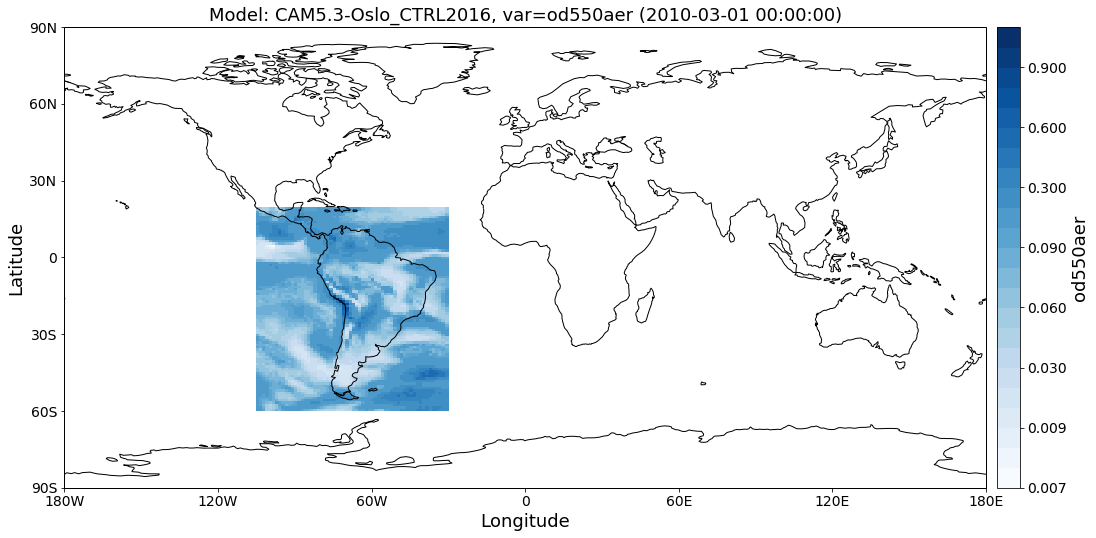

In [14]:
fig = data.crop(region="SAMERICA").quickplot_map(time_idx=0)

We might also be interested in the weighted area average for the month that we extracted.

In [15]:
weighted_mean = data.area_weighted_mean()
weighted_mean

masked_array(data=[0.13791640320289586, 0.14124750077282458,
                   0.14026821774460266, 0.13765764062688907,
                   0.13799386441924807, 0.13356850899504383,
                   0.1360614300579914, 0.13855871749949283,
                   0.13865845188822973, 0.1418257387148213,
                   0.14057638401825043, 0.1383954795505587,
                   0.1439754144248747, 0.1461116937705798,
                   0.14848172934485668, 0.1504189577232701,
                   0.15773716932199822, 0.1669795588240825,
                   0.17558162125906104, 0.17707022826867758,
                   0.17843404416301747, 0.18309553886295593,
                   0.17637980641255796, 0.16969895404314983,
                   0.16454942855787366, 0.16468216159671398,
                   0.1701799164857099, 0.17152435759051723,
                   0.17110234928683343, 0.16790393840056056,
                   0.1654223999902774],
             mask=[False, False, False, False, False,

In [16]:
import pandas as pd
pd.Series(weighted_mean, data.time_stamps()).plot()

NameError: name '_dateparse' is not defined

That should be enough for an introduction. The following notebook introduces in more detail how pyaerocom handles regions and where they can be defined. In the subsequent tutorial, the `ReadGridded` class is introduced, that was usesed above to import model data in a flexible way based on variable name, time range and temporal resolution. The loaded data for each model and variable is then stored in the analysis class `GriddedData` which we use in the end of this notebook and which will be introduced in a later tutorial.